In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
df = pd.read_csv('cleaned_recipes.csv')

In [18]:
df.describe()

,rating,Calories
count,3096.000000,3074.000000
mean,4.506880,353.551724
std,0.367141,224.278822
min,1.000000,1.000000
25%,4.400000,205.250000
50%,4.600000,321.000000
75%,4.700000,458.000000
max,5.000000,3274.000000


In [36]:
df.head()

,url,country,title,steps,rating,dish_type,ingredients,Prep Time,Cook Time,Total Time,Servings,Calories,Fat,Carbs,Protein
0,https://www.allrecipes.com/recipe/81568/afghan...,Afghanistan,Afghan Beef Raviolis (Mantwo),"['In a small bowl, stir together yogurt, mint,...",4.3,Unknown,"['plain yogurt', 'ground beef', 'water', 'carr...",45 mins,1 hr 25 mins,2 hrs 10 mins,4,506.0,16.0,57.0,34.0
1,https://www.allrecipes.com/recipe/179627/aush-...,Afghanistan,Aush (Afghani Chili),['Brown ground beef in a skillet over medium h...,4.4,Unknown,"['ground beef', 'onion', 'garlic', 'garam masa...",15 mins,3 hrs 10 mins,3 hrs 25 mins,6,613.0,21.0,79.0,30.0
2,https://www.allrecipes.com/recipe/165713/afgha...,Afghanistan,Afghan Tomato Soup (Aush Goshti),['Melt butter in a large pot over medium heat....,4.3,Unknown,"['butter', 'onion', 'ground beef', 'tomato', '...",15 mins,1 hr 15 mins,1 hr 30 mins,8,383.0,7.0,63.0,17.0
3,https://www.allrecipes.com/recipe/231795/afgha...,Afghanistan,Afghani Kabli Pulao,"['Make the broth: Place halved onion, garlic h...",4.8,Unknown,"['onion', 'head garlic', 'loose skins', 'cinna...",25 mins,42 mins,1 hr 39 mins,6,378.0,8.0,71.0,9.0
4,https://www.allrecipes.com/recipe/245421/afgha...,Afghanistan,Afghan Sweet Bread (Roht),['Preheat oven to 375 degrees F (190 degrees C...,1.0,Unknown,"['ground cardamom', 'salt', 'eggs', 'white sug...",20 mins,20 mins,40 mins,10,393.0,20.0,49.0,5.0


#### Rating Distribution 
##### View average rating and distribution

In [ ]:
# Rating Distribution:

plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

print("Average Rating:", df['rating'].mean())

##### Convert total time to minutes

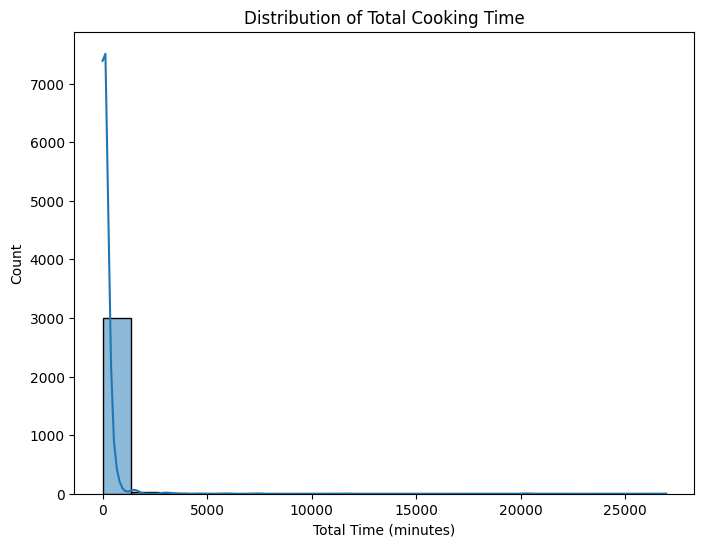

In [31]:
import re

def convert_time_to_minutes(time_str):
    if pd.isna(time_str) or time_str == 'N/A':
        return None
    
    # Initialize variables
    days = 0
    hours = 0
    mins = 0
    
    # Convert hrs to hr
    time_str = time_str.replace('hrs', 'hr')
    
    # Case 1: "day"
    if 'day' in time_str:
        parts = time_str.split('day')
        days = int(re.sub(r'\D', '', parts[0]))  # Take only the number from the days part
        remaining = parts[1].strip() if len(parts) > 1 else '0 hr'
    else:
        remaining = time_str
    
    # Case 2: "hr" and "mins"
    if 'hr' in remaining:
        parts = remaining.split('hr')
        hours = int(re.sub(r'\D', '', parts[0]))  # Take only the number from the hours part
        if len(parts) > 1 and parts[1].strip():  # If there is a minutes part
            mins_part = parts[1].replace('mins', '').strip()
            mins = int(re.sub(r'\D', '', mins_part)) if mins_part else 0
    elif 'mins' in remaining:
        mins = int(re.sub(r'\D', '', remaining.replace('mins', '')))  # Take only the number from the minutes part
    
    # Calculate total minutes
    total_minutes = days * 24 * 60 + hours * 60 + mins
    return total_minutes
    
df_copy = df.copy()
df_copy['Total Time (mins)'] = df_copy['Total Time'].apply(convert_time_to_minutes)

plt.figure(figsize=(8, 6))
sns.histplot(df_copy['Total Time (mins)'].dropna(), bins=20, kde=True)
plt.title('Distribution of Total Cooking Time')
plt.xlabel('Total Time (minutes)')
plt.ylabel('Count')
plt.show()

#### Distribution of Calories:

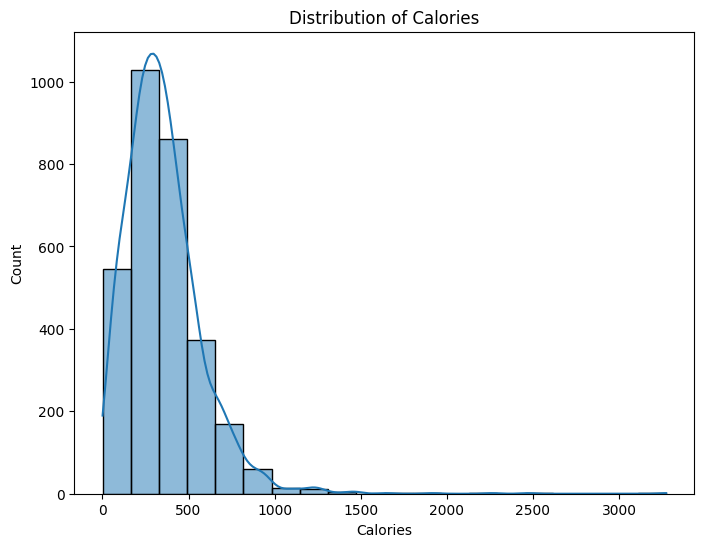

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Calories'].dropna(), bins=20, kde=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Count')
plt.show()

#### Analysis by 'Country'

##### Number of formulas by country

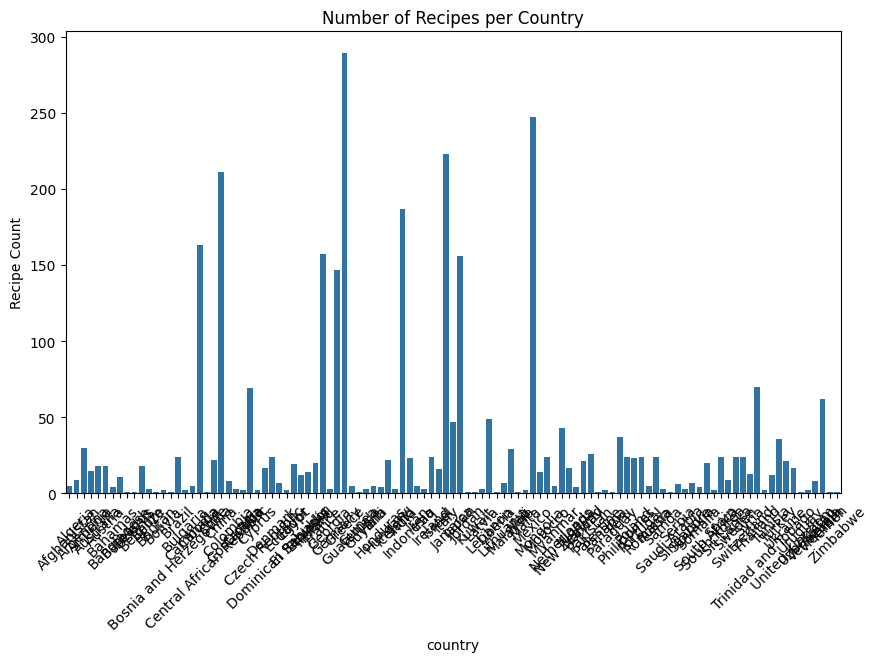

In [35]:
df_recipe_cp = df.copy()

recipe_count = df_recipe_cp.groupby('country').size().reset_index(name='Recipe Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='Recipe Count', data=recipe_count)
plt.title('Number of Recipes per Country')
plt.xticks(rotation=45)
plt.show()